In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

In [2]:
wl = np.linspace(400, 700, 301)
f1 = [70,28,40,6,]
f2 = [80,35,50,13,]
m1 = [75, 30, 45, 8]

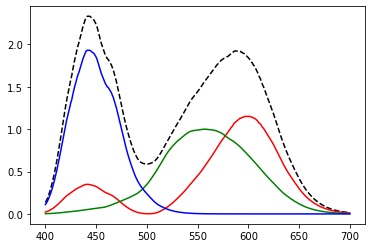

In [3]:
CIE = pd.read_csv('CIE1931.csv')
R = CIE['R'].values
G = CIE['G'].values
B = CIE['B'].values
CIE_spec = R+G+B
plt.plot(wl, CIE_spec, '--k')
plt.plot(wl, R, '-r')
plt.plot(wl, G, '-g')
plt.plot(wl, B, '-b')
plt.show()

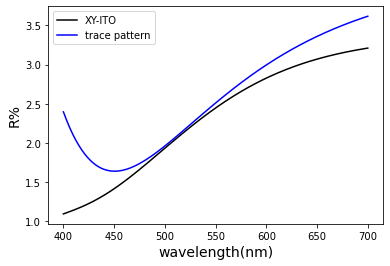

bridge: 4.94154090189536
xy-ITO: 2.3076225939013777
pattern: 2.5524160810549037
delta_d_t: 0.24479348715352572
delta_d_b: 3.0910121043586583


In [6]:
tk = f1

wl = np.linspace(380, 780, 401)
wl1 = np.linspace(400, 700, 301)
hypo_bri = lambda th: tm.Design(
    [air, SiO2, ITO2, OC, ITO1, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], 1400, 70, th[2], th[3], None]
).reflectance(wl1)

hypo_dia = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl1)

hypo_tra = lambda th: tm.Design(
    [air, SiO2, SiO2, NB, sodalime_Nanya],
    [None, th[0],th[2], th[3], None]
).reflectance(wl1)

#plt.plot(wl1, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl1, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl1, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.savefig('Nanya_Bonsai_sim_dt.png')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))

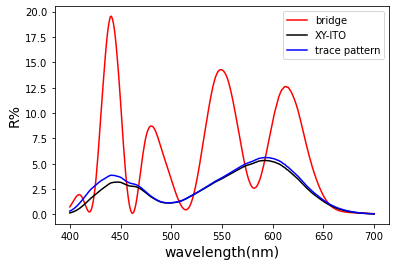

bridge: 5.780402224967739
xy-ITO: 2.424543245913018
pattern: 2.652014700114688
delta_d_t: 0.22747145420167023
delta_d_b: 3.8354924001575643


In [37]:
plt.plot(wl1, 100*hypo_bri(tk)*CIE_spec, '-r', label = 'bridge')
plt.plot(wl1, 100*hypo_dia(tk)*CIE_spec, '-k', label = 'XY-ITO')
plt.plot(wl1, 100*hypo_tra(tk)*CIE_spec, '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.savefig('Nanya_Bonsai_sim_CIE.png')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)*CIE_spec))
print('xy-ITO:',100*np.mean(hypo_dia(tk)*CIE_spec))
print('pattern:',100*np.mean(hypo_tra(tk)*CIE_spec))
print('delta_d_t:',np.mean(abs(100*CIE_spec*(hypo_tra(tk)-hypo_dia(tk)))))
print('delta_d_b:',np.mean(abs(100*CIE_spec*(hypo_bri(tk)-hypo_dia(tk)))))